<a href="https://colab.research.google.com/github/kebabee/ML-assiociative-memory/blob/main/mean_multipatterns_associative_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing and generating data (irrelevant)

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
from io import BytesIO
from PIL import Image
import random
import tensorflow as tf

response = requests.get("https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/bfa215afd00124cf2c32b26aea42381588e75982/hopfield_header.py")

if response.status_code == 200:
    with open('hopfield_header.py', 'wb') as f:
        f.write(response.content)
    print("hopfield_header.py downloaded successfully.")
else:
    print("Failed to download hopfield_header.py.")


import hopfield_header as hopf

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

unique_labels = np.unique(train_labels)

valid1 = []

for i in range(4065,5420):
  temp = []
  for label in unique_labels:
    label_indices = np.where(train_labels == label)[0]
    selected_image = train_images[label_indices[i]]
    selected_image = selected_image.reshape(-1)
    temp.append(selected_image)
  valid1.append(temp)

train1 = []

for i in range(4065):
  temp = []
  for label in unique_labels:
    label_indices = np.where(train_labels == label)[0]
    selected_image = train_images[label_indices[i]]
    selected_image = selected_image.reshape(-1)
    temp.append(selected_image)
  train1.append(temp)

hopfield_header.py downloaded successfully.


In [79]:
pattern_images = []
for i in range(10):
  pattern_images.append([np.zeros(784) for _ in range(10)])

pattern_images = np.array(pattern_images)
print(np.array(pattern_images).shape)

for k in range(1,11):
  for idx in range(406*(k-1),406*k):

    test0 = []

    for label in unique_labels:
      label_indices = np.where(train_labels == label)[0]
      selected_image = train_images[label_indices[idx]]
      selected_image = selected_image.reshape(-1)
      test0.append(selected_image)

    for i in range(10):
      for j in range(784):
        pattern_images[i][k-1][j] += test0[i][j]/406

(10, 10, 784)


# Classification by average digit *multi-pattern*

Concept: Average MNIST digits worked for ~61% images. The new idea is to create 10 average patterns per digit, instead of 1 each. Each of the 100 average patterns is calculated on the basis of 10% examples of a given digit.

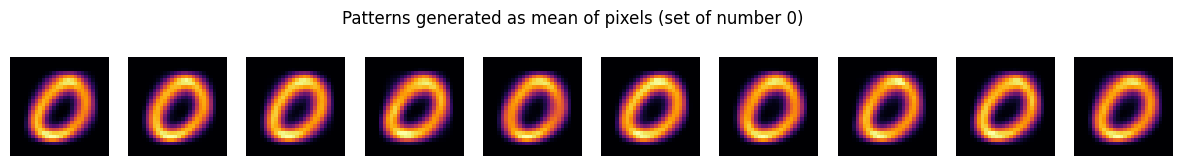

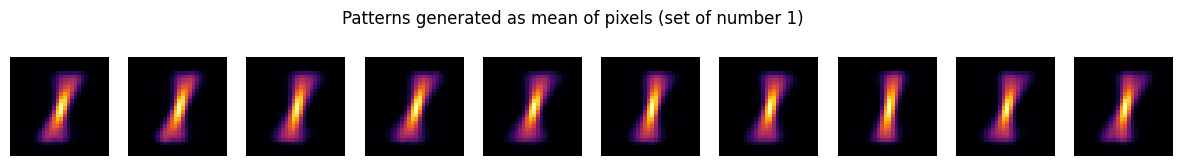

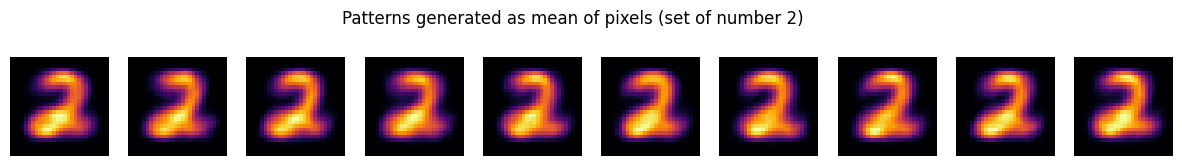

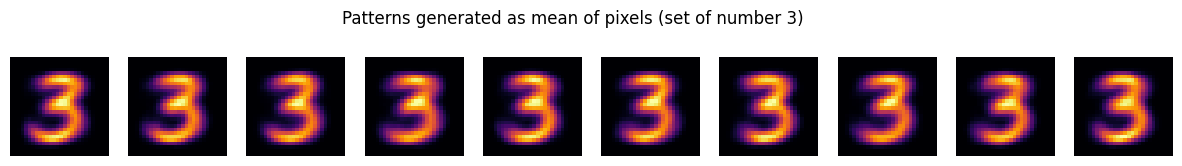

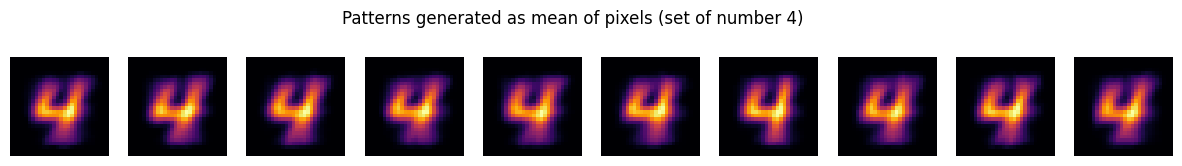

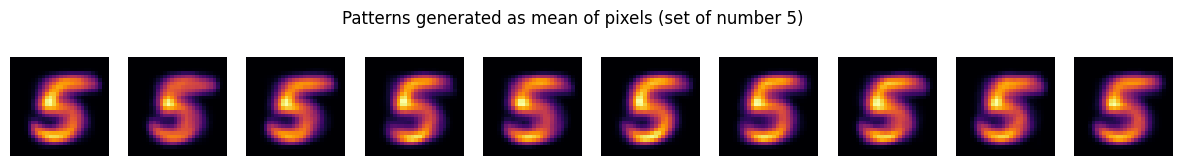

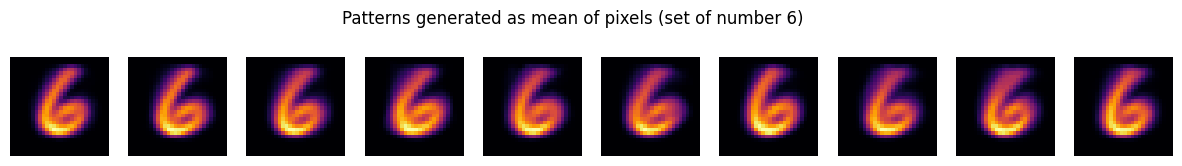

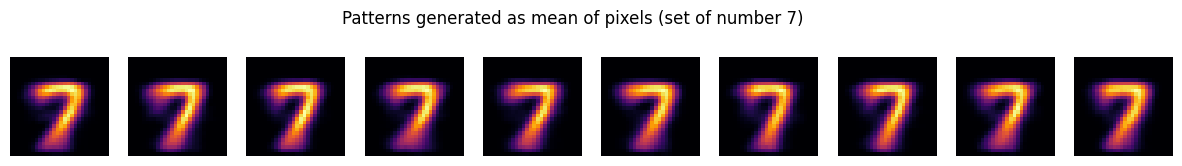

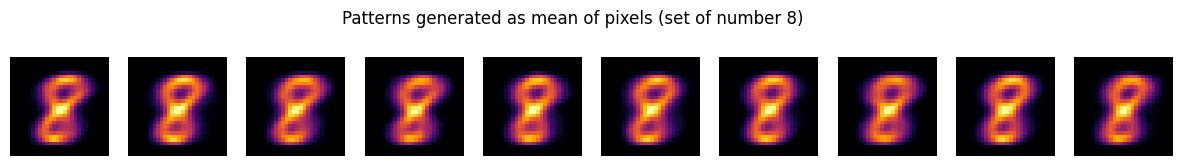

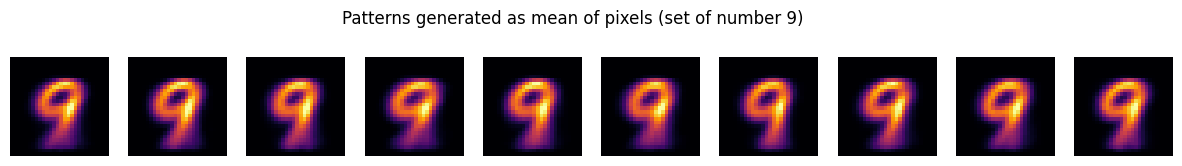

In [80]:
for k in range(10):
    fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # Zmieniono na 1 wiersz i 10 kolumn
    for i in range(10):
        axes[i].imshow(pattern_images[k][i].reshape(28, 28), cmap='inferno')
        axes[i].axis('off')

    plt.suptitle(f'Patterns generated as mean of pixels (set of number {k})')
    plt.show()

They are similar to each other, but will probably generate slightly different energy minimas. Results on test and training dataset:

In [81]:
patterns = np.reshape(pattern_images, (100, 784))

network1 = hopf.hopfield_net(784)
network1.set_patterns(patterns)
beta = 10.0
numOfTest = 0
score = 0

for i in range(len(valid1)):
  for j in range(10):
    result, index = network1.hopfield_layer(valid1[i][j], beta)
    numOfTest += 1
    if float(index) in list(np.linspace(j*10,(j+1)*10-1,10)):
      score += 1

print(f"Accuracy for test dataset: {score/numOfTest * 100:.2f}%")

numOfTest = 0
score = 0

for i in range(len(train1)):
  for j in range(10):
    result, index = network1.hopfield_layer(train1[i][j], beta)
    numOfTest += 1
    if float(index) in list(np.linspace(j*10,(j+1)*10-1,10)):
      score += 1

print(f"Accuracy for train dataset: {score/numOfTest * 100:.2f}%")

Accuracy for test dataset: 63.36%
Accuracy for train dataset: 63.47%


The results have improved but slightly. Apparently, the new patterns are too similar to see any significant change. Here are some examples of the results:

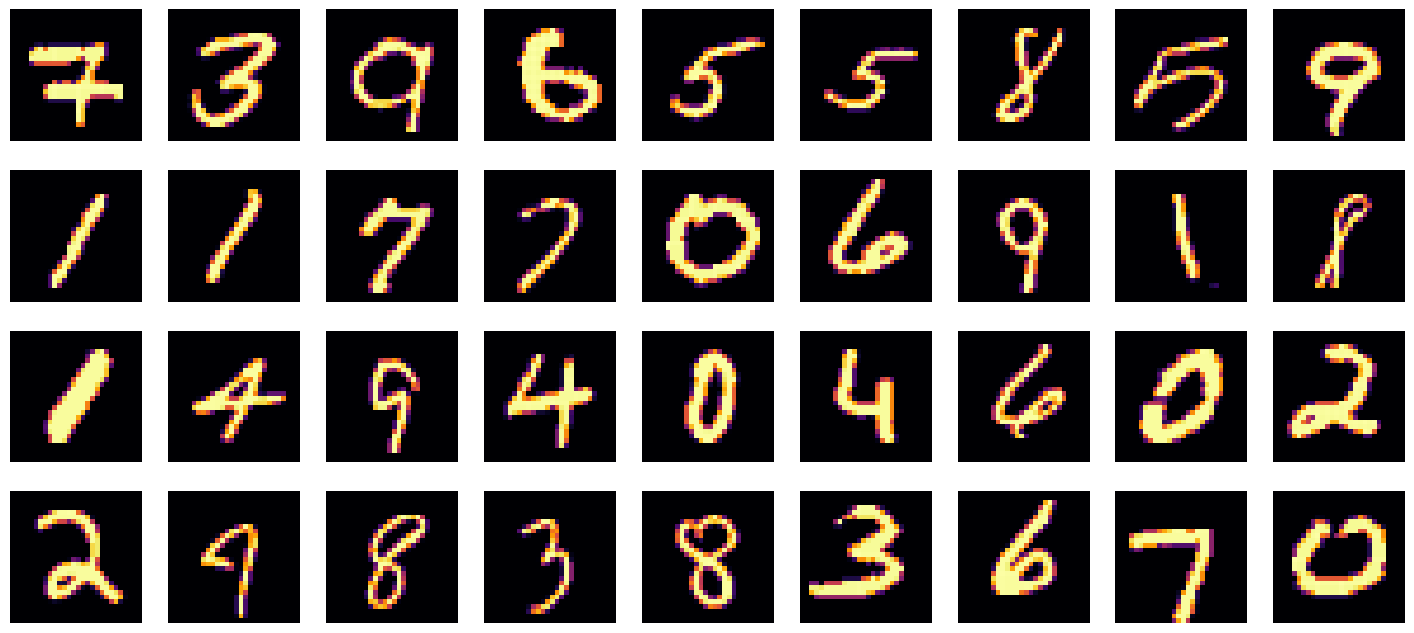

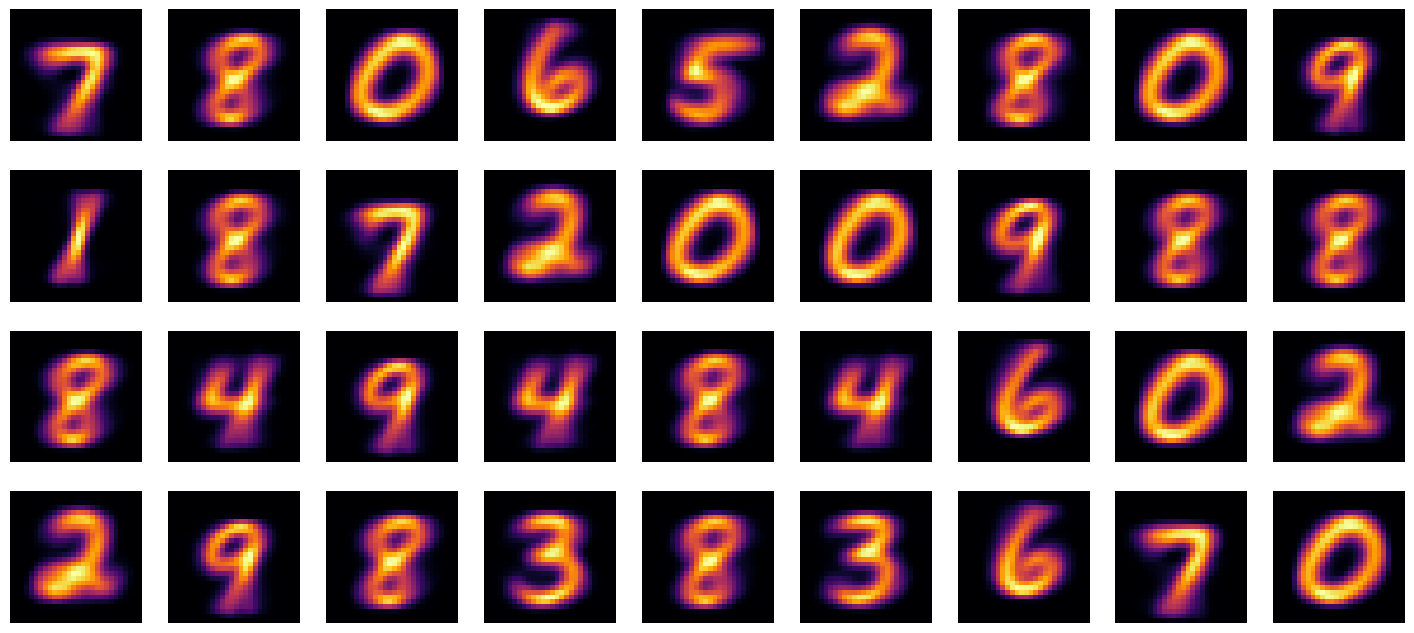

In [82]:
valid = []

for _ in range(4):
  for label in unique_labels:
      label_indices = np.where(train_labels == label)[0]
      selected_image = train_images[label_indices[random.randint(0,5420)]]
      selected_image = selected_image.reshape(-1)  #reshape macierzy na wektor
      valid.append(selected_image)

random.shuffle(valid)

fig, axes = plt.subplots(4, 9, figsize=(18, 8))
for i in range(36):
    row, col = i % 4, i // 4
    axes[row, col].imshow(valid[i].reshape(28, 28), cmap="inferno")
    axes[row, col].axis('off')
plt.show()

fig, axes = plt.subplots(4, 9, figsize=(18, 8))
for i in range(36):
    result, index = network1.hopfield_layer(valid[i], beta)
    row, col = i % 4, i // 4
    axes[row, col].imshow(result.reshape(28, 28), cmap="inferno")
    axes[row, col].axis('off')
plt.show()

## 30 patterns per digit

Last attempt, will increasing the number of patterns cause a bigger change on the score? Example is similar, but for every digit 30 average patterns are generated (3.3% of examples per pattern).

In [83]:
pattern_images = []
for i in range(10):
  pattern_images.append([np.zeros(784) for _ in range(30)])

pattern_images = np.array(pattern_images)

for k in range(1,31):
  for idx in range(135*(k-1),135*k):

    test0 = []

    for label in unique_labels:
      label_indices = np.where(train_labels == label)[0]
      selected_image = train_images[label_indices[idx]]
      selected_image = selected_image.reshape(-1)
      test0.append(selected_image)

    for i in range(10):
      for j in range(784):
        pattern_images[i][k-1][j] += test0[i][j]/135

patterns = np.reshape(pattern_images, (300, 784))

network1 = hopf.hopfield_net(784)
network1.set_patterns(patterns)
beta = 10.0
numOfTest = 0
score = 0

for i in range(len(valid1)):
  for j in range(10):
    result, index = network1.hopfield_layer(valid1[i][j], beta)
    numOfTest += 1
    if float(index) in list(np.linspace(j*30,(j+1)*30-1,30)):
      score += 1

print(f"Accuracy for test dataset: {score/numOfTest * 100:.2f}%")

numOfTest = 0
score = 0

for i in range(len(train1)):
  for j in range(10):
    result, index = network1.hopfield_layer(train1[i][j], beta)
    numOfTest += 1
    if float(index) in list(np.linspace(j*30,(j+1)*30-1,30)):
      score += 1

print(f"Accuracy for train dataset: {score/numOfTest * 100:.2f}%")

Accuracy for test dataset: 64.97%
Accuracy for train dataset: 64.92%


Despite the significant increase in the number of patterns, again the improvement in the result is small. In addition, model running time and memory complexity have increased. With a further increase in the number of patterns, it will become increasingly difficult to talk about any classification. The borderline situation is as many patterns as images which, of course, makes no sense. It can be assumed that with a reasonable memory complexity ($2*10^4$ pixels in the model with $4*10^7$ pixels in the database) for this database the result will oscillate within [63%,65%] depending on the parameters of counting the average.